
# Project: Investigate a Dataset (tmdb-movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  This data set contains information about 10K movies collected from The Movie Database (TMDb), each movie contains infomation about its budget, revenue, popularity, etc. 
some columns, as ‘cast’ and ‘genres’ contain multiple values separated by pipe (|) characters.


### Approach

 1. Preview and clean the data.
      - Remove unnecessary information that are not useful for analysis
      - Remove any null and duplicated values
      - Change data types if needed


 2. Explore the data and draw conclusion to answer questions.
      - Find information that help reaching our goal.
      - Group and filter certain data to find important patterns

### Quesitons:

1. What kinds of properties are associated with movies that have high revenues?
2. Which is the highest-grossing movie of all time?
3. what is the movie with highest budget?
4. what is the most popular movie?
5. what is the relation between popularity and vote_count?
6. The top 5 directors made highly rated films? 
7. Does the realsing date affects movie's revenues?
8. what is the most popular generes?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
In this section we will see how the data is represented, what will we use to answer the previous questions.

### General Properties
1. Loading the dataset and representing the first five rows
2. figure out the datatypes of colums and missing values
3. drop unwanted columns 
4. count number of rows that has null and duplicate values
5. show statistical values of the dataset

In [2]:
# loading the dataset and represent the first five rows 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# figure out the datatypes of colums and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# drop columns that won't be useful in answering the previous questions.
df.drop(['id','imdb_id','homepage','cast','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [5]:
#count null values in each columns 
df.isnull().sum(axis = 0)

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [6]:
# count number of duplicate rows
df.duplicated().sum()

1

In [7]:
#statistical values of the dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000



### Data Cleaning 
##### 1. convert 'release_year' column type from object to datetime
##### 2. drop rows has null in any field or nulls 



In [8]:
# convert type of release_year column to datetype 
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.dropna(axis=0, how="any",inplace=True)

In [10]:
df.drop_duplicates(inplace =True)

In [11]:
# genres column has values separated by '|', convert it to list 
df['genres']=df['genres'].apply(lambda x:x.split('|'))
df['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 9806, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

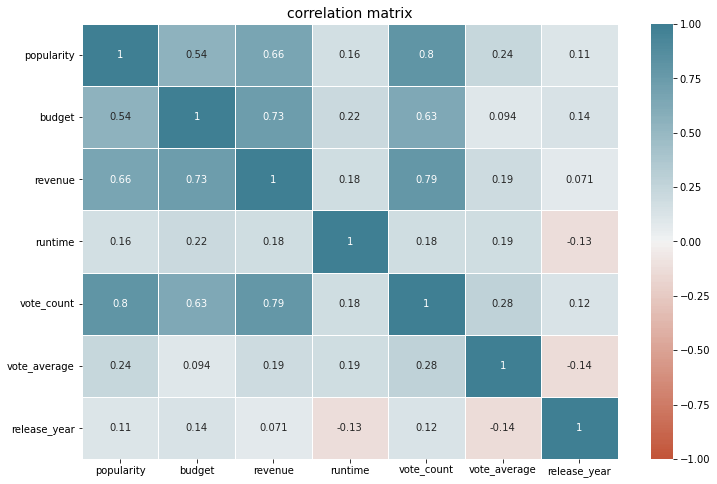

In [12]:
# calculate and visualize the correlation matrix to figure out factores affect the movie's revenues
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, linewidths=.5
)
ax.set_xticklabels( ax.get_xticklabels() );
plt.title('correlation matrix', fontsize=14);

from correlation matrix we figure out that:
 1. vote_count
 2. budget
 3. popularity 
 
affects revenu of movies 

### Research Question 2  (Which is the highest-grossing movie of all time? )

In [13]:
df[df['revenue'] == df['revenue'].max()]


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009


- 'Avatar'  is the highest-grossing movie with 2781505847$

### Research Question 3 (what is the movie with highest budget? )

In [14]:
df[df['budget']== df['budget'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2244,0.25054,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,"[Adventure, Fantasy, Action, Western, Thriller]",Boram Entertainment Inc.,2010-12-02,74,6.4,2010


- 'The Warrior's Way' with budget 425000000$

### Research Question 4 (what is the most popular movie?)


In [15]:
df[df['popularity']== df['popularity'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


- 'Jurassic World' is the most popular movie 

### Research Question 5 (what is the relation between popularity and vote_average?)

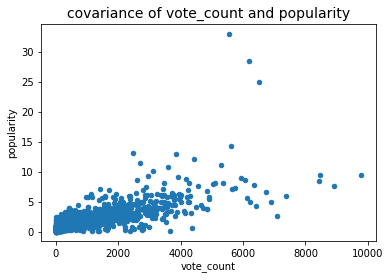

In [16]:
df.plot(x='vote_count',y='popularity',kind='scatter');
plt.title('covariance of vote_count and popularity', fontsize=14);

- from the above graph, we can figure out that the popularity of the movies increases with the increase of the vote_count

### Research Question 4 ( The top 5 directors made highly rated films?)

In [17]:
top_5 = df.groupby('director')['vote_average'].mean().nlargest(5)
print (f'The top 5 directors made highly rated films are: \n{top_5.index}')

The top 5 directors made highly rated films are: 
Index(['David Mallet', 'Curt Morgan', 'Martin Scorsese|Michael Henry Wilson',
       'Saul Swimmer', 'Jorge RamÃ­rez SuÃ¡rez'],
      dtype='object', name='director')


- we find out that 'David Mallet','Curt Morgan','Martin Scorsese|Michael Henry Wilson','Saul Swimmer','Jorge RamÃ­rez' are the top 5 directore made highly rated films

### Research Question 5 (Does the realsing date affects movie's revenues?)

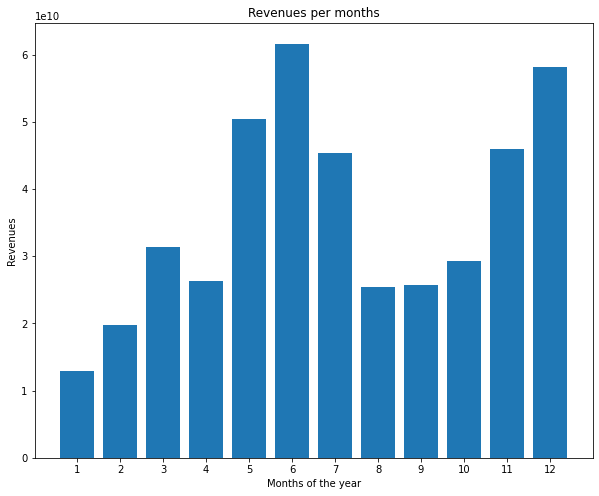

In [18]:
df['month'] = df['release_date'].dt.month
df_month = df.groupby('month')['revenue'].sum()

fig = plt.figure(figsize=(10, 8))
x = df_month.index
y = df_month.values
plt.xticks(x)
plt.bar(x, y)
plt.xlabel("Months of the year")
plt.ylabel("Revenues")
plt.title('Revenues per months')
plt.show()

- from the graph we figure out tha month "Dec-june" has the highest revenu 

In [19]:
# counts of movies produced by each production company

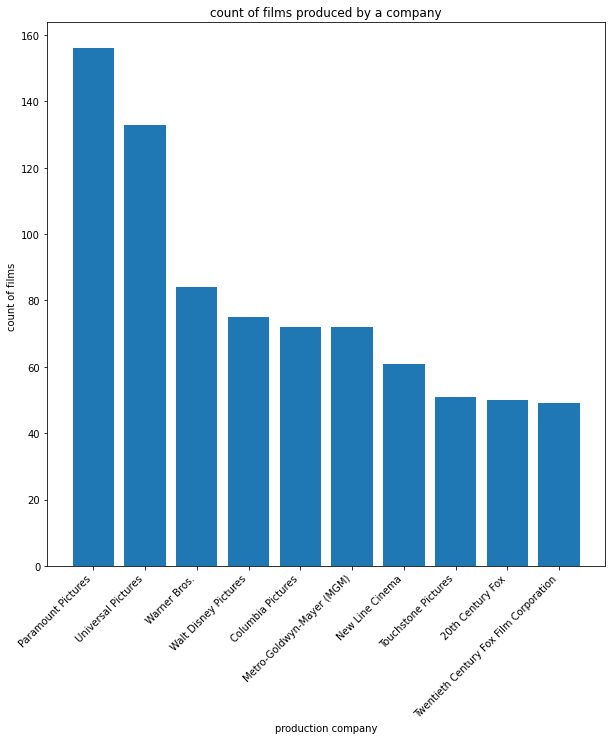

In [20]:
comp = df.production_companies.value_counts().head(10)
fig = plt.figure(figsize=(10, 10))
x = comp.index
y = comp.values
plt.bar(x, y)
plt.xlabel("production company")
plt.xticks(rotation=45,ha ='right')
plt.ylabel("count of films ")
plt.title('count of films produced by a company')
plt.show()


### Research Question 6 (what is the most popular generes?)

In [21]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

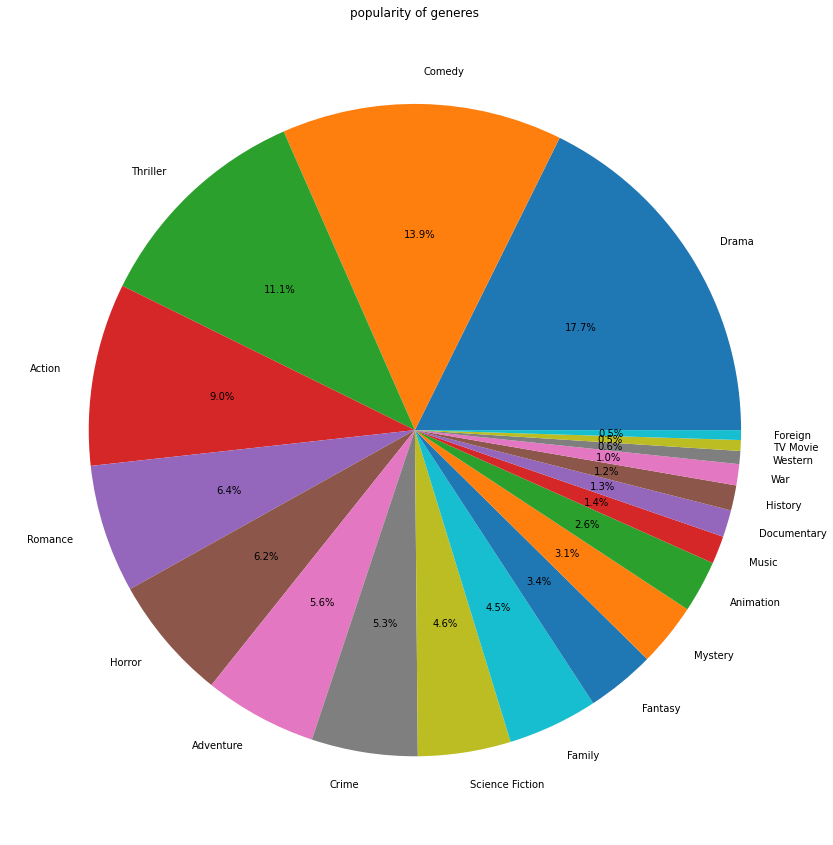

In [28]:
df_generes = to_1D(df["genres"]).value_counts()

fig = plt.figure(figsize=(15, 15))

plt.pie(x=df_generes.values, labels=df_generes.index,autopct='%1.1f%%')
plt.title('popularity of generes', fontsize=12);

<a id='conclusions'></a>
## Conclusions

1. "vote_count,budget,popularity" affects movie's revenu
2. the highest-grossing movie of all time is the Avatar 
3. 'vote_count' and 'popularity has a positive correlation "increases with each other"
4. movies released during December and june has highest revenu
5. David Mallet - Curt Morgan - Martin Scorsese|Michael Henry Wilson - Saul Swimmer - Jorge RamÃ­rez SuÃ¡rez    
are the directors made highly rated films
6. Drama and comedy are the most popular generes


## Dataset Limitations
1. some colums were irrelevant and contain null values.
2. genres and cast of movies are concatenated.
